In [1]:
import pulp

In [2]:

soc = [50,50,80,50,90,60]
n = len(soc)
stations = [80,120,160]
#stations = [90,120,150]
speed = 40
charging_rate_station = 10
ex_charging_rate_bess = 20
arrival_time = [7,8,10,13,14,14]
T = 1000
bess_capacity = 300
bess_init = [150,120]
kms_to_soc = 1/2
for i in range(len(stations)):
    stations[i]=stations[i]*kms_to_soc
speed = speed*kms_to_soc
print(speed)
print(stations)

time_discre = 4
for i in range(len(arrival_time)):
    arrival_time[i] *= time_discre
speed = speed/time_discre
charging_rate_station = charging_rate_station/time_discre
ex_charging_rate_bess = ex_charging_rate_bess/time_discre

20.0
[40.0, 60.0, 80.0]


In [14]:
#initiate the model
cs = pulp.LpProblem("station",pulp.LpMinimize)
vehicles=[]
s_names = []
#add variables
soc_vehicle = {}
arrival_time_vehicle = {}
for i in range(n):
    vehicles.append(f"V{i}")
    soc_vehicle[f"V{i}"] = soc[i]
    arrival_time_vehicle[f"V{i}"] = arrival_time[i]
m = len(stations)-1
bess_init_name = {}
for i in range(m):
    s_names.append(f"station{i+1}")
    bess_init_name[f"station{i+1}"] = bess_init[i]
print(s_names)
    
M = 100000
print(vehicles)
a = {}
s = {}
u = {}
d = {}
o = {}
sb = {}
b = {}
bc = {}
charge = {}
bac = {}

for station in s_names:
    #arrival time at stations
    a[station] = pulp.LpVariable.dict(f"Arrival Time {station}",[vehicle for vehicle in vehicles],lowBound=0,upBound=T,cat=pulp.LpInteger)
    
    # servicing time at stations
    s[station] = pulp.LpVariable.dict(f"Service Time {station}",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
    
    #initial charging time at sations
    u[station] = pulp.LpVariable.dict(f"initial charge time {station}",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
    
    #final charge time at stations
    d[station] = pulp.LpVariable.dict(f"final charge time {station}",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
    
    # sigma- temporal ordering of vehicles
    o[station] = pulp.LpVariable.dict(f"sigma {station}",[vehicle1+vehicle2 for vehicle1 in vehicles for vehicle2 in vehicles if vehicle1 != vehicle2],lowBound=0,cat=pulp.LpBinary)
    
    # to see if vehicle is gonna use the respective station
    sb[station] = pulp.LpVariable.dict(f"Service Time {station} binary",[vehicle for vehicle in vehicles],cat=pulp.LpBinary)
    
    #bess servicing times at stations
    b[station] = pulp.LpVariable.dict(f"BESS service Time {station}",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
    
    # charge in bess available for vehicles
    bc[station] = pulp.LpVariable.dict(f"BESS charge {station}",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
    
    # if bess reached max charge or not
    charge[station] = pulp.LpVariable.dict(f"reached max charge {station}",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpBinary)
    
    #amount to charge
    bac[station] = pulp.LpVariable.dict(f"BESS charge for vehicle {station}",[vehicle for vehicle in vehicles],cat=pulp.LpInteger)





#a1 = pulp.LpVariable.dict("Arrival Time 1",[vehicle for vehicle in vehicles],lowBound=0,upBound=T,cat=pulp.LpInteger)
#a2 = pulp.LpVariable.dict("Arrival Time 2",[vehicle for vehicle in vehicles],lowBound=0,upBound=T,cat=pulp.LpInteger)
# servicing time at stations
#s1 = pulp.LpVariable.dict("Service Time 1",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
#s2 = pulp.LpVariable.dict("Service Time 2",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
#initial charging time at sations
#u1 = pulp.LpVariable.dict("initial charge time 1",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
#u2 = pulp.LpVariable.dict("initial charge time 2",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
#final charge time at stations
#d1 = pulp.LpVariable.dict("final charge time 1",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
#d2 = pulp.LpVariable.dict("final charge time 2",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
# sigma- temporal ordering of vehicles
#o1 = pulp.LpVariable.dict("sigma 1",[vehicle1+vehicle2 for vehicle1 in vehicles for vehicle2 in vehicles if vehicle1 != vehicle2],lowBound=0,cat=pulp.LpBinary)
#o2 = pulp.LpVariable.dict("sigma 2",[vehicle1+vehicle2 for vehicle1 in vehicles for vehicle2 in vehicles if vehicle1 != vehicle2],lowBound=0,cat=pulp.LpBinary)
# to see if vehicle is gonna use the respective station
#sb1 = pulp.LpVariable.dict("Service Time 1 binary",[vehicle for vehicle in vehicles],cat=pulp.LpBinary)
#sb2 = pulp.LpVariable.dict("Service Time 2 binary",[vehicle for vehicle in vehicles],cat=pulp.LpBinary)
#bess servicing times at stations
#b1 = pulp.LpVariable.dict("BESS service Time 1",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
#b2 = pulp.LpVariable.dict("BESS service Time 2",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
# charge in bess available for vehicles
#bc1 = pulp.LpVariable.dict("BESS charge 1",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
#bc2 = pulp.LpVariable.dict("BESS charge 2",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpInteger)
# if bess reached max charge or not
#charge1 = pulp.LpVariable.dict("reached max charge 1",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpBinary)
#charge2 = pulp.LpVariable.dict("reached max charge 2",[vehicle for vehicle in vehicles],lowBound=0,cat=pulp.LpBinary)
#amount to charge
#bac1 = pulp.LpVariable.dict("BESS charge for vehicle 1",[vehicle for vehicle in vehicles],cat=pulp.LpInteger)
#bac2 = pulp.LpVariable.dict("BESS charge for vehicle 2",[vehicle for vehicle in vehicles],cat=pulp.LpInteger)
for i in range(len(s_names)):
    for vehicle in vehicles:
        if i == 0:
            cs += a[s_names[i]][vehicle] == arrival_time_vehicle[vehicle]+(stations[0]/speed)
        else:
            cs += a[s_names[i]][vehicle] == (stations[i]/speed) + d[s_names[i]][vehicle]
for vehicle in vehicles:
    cs += u[s_names[-1]] <= T-s[s_names[-1]][vehicle]
dist = 0
for i in range(len(s_names)):
    dist += stations[i]
    for vehicle in vehicles:
        cs += charging_rate_station*(pulp.lpSum(s[s_names[j]][vehicle] for j in range(i+1)))+ex_charging_rate_bess*(pulp.lpSum(b[s_names[j]][vehicle] for j in range(i+1))) + soc_vehicle[vehicle] >= dist + stations[i+1]
        cs += charging_rate_station*(pulp.lpSum(s[s_names[j]][vehicle] for j in range(i+1)))+ex_charging_rate_bess*(pulp.lpSum(b[s_names[j]][vehicle] for j in range(i+1))) + soc_vehicle[vehicle] -dist <= 100
# total charge[i] >= total distance travelled + station[i+1]
# total charge[i] <= 100
#constraints
for station in s_names:
    for vehicle in vehicles:
        
        #departure = service + charge start
        cs += d[station][vehicle] == s[station][vehicle]+u[station][vehicle]

        # charge start > arival time
        cs += u[station][vehicle]>=a[station][vehicle]
        #cs += u2[vehicle]<=T-s2[vehicle]

        # arrival times of each station 
        #cs += a1[vehicle] == arrival_time_vehicle[vehicle]+(stations[0]/speed)
        #cs += a2[vehicle] == (stations[1]/speed) + d1[vehicle]

        # ensuring soc capabilities ------- need to implement
        #cs += charging_rate_station*s1[vehicle]+ex_charging_rate_bess*b1[vehicle] + soc_vehicle[vehicle]>=stations[0]+stations[1]
        #cs += charging_rate_station*s1[vehicle]+ex_charging_rate_bess*b1[vehicle] + soc_vehicle[vehicle]<=100
        #cs += charging_rate_station*(s2[vehicle]+s1[vehicle])+ex_charging_rate_bess*(b2[vehicle]+b1[vehicle])+soc_vehicle[vehicle]>=stations[0]+stations[1]+stations[2]
        #cs += charging_rate_station*(s2[vehicle]+s1[vehicle])+ex_charging_rate_bess*(b2[vehicle]+b1[vehicle])+soc_vehicle[vehicle]-stations[0]-stations[1]<=100

        #to see if a vehicle wants to cross the station or charge there
        cs += M*sb[station][vehicle] >=s[station][vehicle]
        cs += sb[station][vehicle] <= s[station][vehicle]
        # bess time should be less than total charging time at 
        cs += b[station][vehicle]<=s[station][vehicle]
        cs += b[station][vehicle]*ex_charging_rate_bess<=bc[station][vehicle]
        #checking if the amount we charge is greater than 100 or not
        cs += M*charge[station][vehicle]>=bess_init_name[station]+bac[station][vehicle]-bess_capacity
        cs += M*(1-charge[station][vehicle]) >= -(bess_init_name[station]+bac[station][vehicle]-bess_capacity)

        # implementing max of bess capaicty
        cs += bc[station][vehicle]>= bess_capacity - M*(1-charge[station][vehicle])
        cs += bc[station][vehicle]>= bess_init_name[station] + bac[station][vehicle] - M*(charge[station][vehicle])
        cs += bc[station][vehicle]<= bess_capacity + M*(1-charge[station][vehicle])
        cs += bc[station][vehicle]<= bess_init_name[station] + bac[station][vehicle] + M*(charge[station][vehicle])  
            
    # for bess implementations
    for station in s_names:
        for i in range(len(vehicles)):
            cs += bac[station][vehicles[i]] ==  (u[station][vehicles[i]]-u[station][vehicles[0]] - 2*pulp.lpSum([b[station][vehicles[j]]] for j in range(i-1,-1,-1)))*ex_charging_rate_bess    # for waiting time implementation 
    for vehicle1 in vehicles:

        for vehicle2 in vehicles:
            if vehicle1!=vehicle2:
                
                #making sure o1[vehicle1+vehicle2] = 1 when vehicle1 in front of vehicle2
                cs += M*o[station][vehicle1+vehicle2] >= a[station][vehicle2]-a[station][vehicle1]
                cs += M*(1-o[station][vehicle1+vehicle2])>= a[station][vehicle1]-a[station][vehicle2]
                
                #implementing wait time
                cs += u[station][vehicle2]-u[station][vehicle1]-s[station][vehicle1]>=(o[station][vehicle1+vehicle2]-1)*T-M*(1-sb[station][vehicle2])                
                
                #making sure only one vehicle is front of another
                cs += o[station][vehicle1+vehicle2] + o[station][vehicle2+vehicle1] >= 1


['station1', 'station2']
['V0', 'V1', 'V2', 'V3', 'V4', 'V5']


In [15]:
cs

station:
MINIMIZE
None
SUBJECT TO
_C1: Arrival_Time_station1_V0 = 36

_C2: Arrival_Time_station1_V1 = 40

_C3: Arrival_Time_station1_V2 = 48

_C4: Arrival_Time_station1_V3 = 60

_C5: Arrival_Time_station1_V4 = 64

_C6: Arrival_Time_station1_V5 = 64

_C7: Arrival_Time_station2_V0 - final_charge_time_station2_V0 = 12

_C8: Arrival_Time_station2_V1 - final_charge_time_station2_V1 = 12

_C9: Arrival_Time_station2_V2 - final_charge_time_station2_V2 = 12

_C10: Arrival_Time_station2_V3 - final_charge_time_station2_V3 = 12

_C11: Arrival_Time_station2_V4 - final_charge_time_station2_V4 = 12

_C12: Arrival_Time_station2_V5 - final_charge_time_station2_V5 = 12

_C13: - Service_Time_station2_V0 - initial_charge_time_station2_V0
 - initial_charge_time_station2_V1 - initial_charge_time_station2_V2
 - initial_charge_time_station2_V3 - initial_charge_time_station2_V4
 - initial_charge_time_station2_V5 >= -1000

_C14: - Service_Time_station2_V1 - initial_charge_time_station2_V0
 - initial_charge_time

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/sushi/Desktop/internship/Routing/.venv/lib/python3.8/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/c173232e44d44de5bae9476c4728ab58-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/c173232e44d44de5bae9476c4728ab58-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 449 COLUMNS
At line 2092 RHS
At line 2537 BOUNDS
At line 2706 ENDATA
Problem MODEL has 444 rows, 168 columns and 1280 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 93.3333 - 0.00 seconds
Cgl0003I 6 fixed, 107 tightened bounds, 57 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 21 tightened bounds, 62 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 24 strengthened rows, 0 substitutions
Cgl0004I processed model has 222 rows, 98 columns (98 integer (43 of which binary)) an

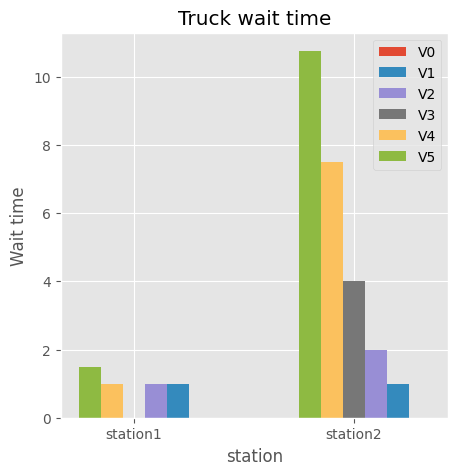

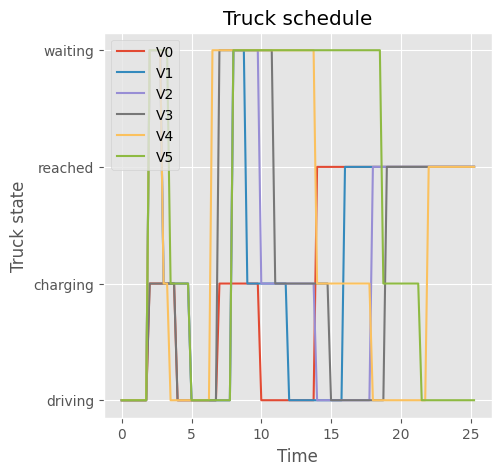

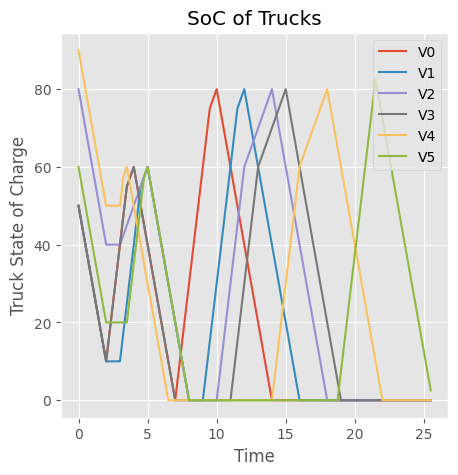

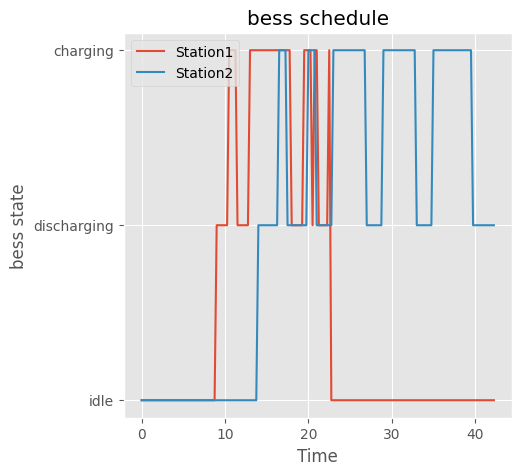

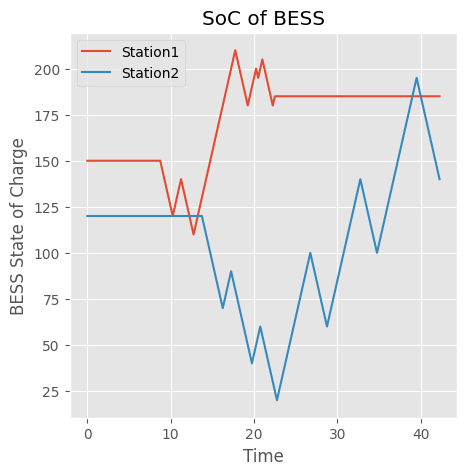

 schedule of trucks | depot dept | station 1 arrival | charge start | charge end | station 1 dept | station 2 arrival | charge start | charge end | station 2 dept | arrival to destination |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         V0         |     28     |        36         |      36      |     44     |       44       |        56         |      56      |     68     |       68       |           84           |
         V1         |     32     |        40         |      44      |     52     |       52       |        64         |      68      |     80     |       80       |           96           |
         V2         |     40     |        48         |      52      |     60     |       60       |        72         |      80      |     96     |       96       |          112           |
         V3         |     52     |        60      

In [7]:


#objective function
cs += pulp.lpSum([d1[vehicle]-a1[vehicle] + d2[vehicle]-a2[vehicle]] for vehicle in vehicles)
cs.solve()

pulp.LpStatus[cs.status]

print("wait and charging time is ",pulp.value(cs.objective))

state = {}
for vehicle in vehicles:
    state[vehicle] = []
max_len = 0
for vehicle in vehicles:
    for i in range(int(stations[0]/speed)):
        state[vehicle].append("driving")
    for j in range(int(u1[vehicle].varValue-a1[vehicle].varValue)):
        state[vehicle].append("waiting")
    for k in range(int(s1[vehicle].varValue)):
        state[vehicle].append("charging")
    for l in range(int(stations[1]/speed)):
        state[vehicle].append("driving")
    for v in range(int(u2[vehicle].varValue-a2[vehicle].varValue)):
        state[vehicle].append("waiting")
    for k in range(int(s2[vehicle].varValue)):
        state[vehicle].append("charging")
    for i in range(int(stations[2]/speed)):
        state[vehicle].append("driving")
    if len(state[vehicle])>max_len:
        max_len = len(state[vehicle])
for vehicle in vehicles:
    if len(state[vehicle]) < max_len:
        for i in range(max_len-len(state[vehicle])):
            state[vehicle].append("reached")
# state is first graph variable     max_ len is max time       
            
soc_trucks = {}
max_len_soc = 0
for vehicle in vehicles:
    soc_trucks[vehicle] = [soc_vehicle[vehicle]]
for vehicle in vehicles:
    for i in range(int(stations[0]/speed)):
        soc_trucks[vehicle].append(soc_trucks[vehicle][-1]-speed)
    for j in range(int(u1[vehicle].varValue-a1[vehicle].varValue)):
        soc_trucks[vehicle].append(soc_trucks[vehicle][-1])
    for k in range(int(b1[vehicle].varValue)):
        soc_trucks[vehicle].append(soc_trucks[vehicle][-1]+ex_charging_rate_bess+charging_rate_station)
    for i in range(int(s1[vehicle].varValue-b1[vehicle].varValue)):
        soc_trucks[vehicle].append(soc_trucks[vehicle][-1]+charging_rate_station)
    for l in range(int(stations[1]/speed)):
        soc_trucks[vehicle].append(soc_trucks[vehicle][-1]-speed)
    for v in range(int(u2[vehicle].varValue-a2[vehicle].varValue)):
        soc_trucks[vehicle].append(soc_trucks[vehicle][-1])
    for k in range(int(b2[vehicle].varValue)):
        soc_trucks[vehicle].append(soc_trucks[vehicle][-1]+ex_charging_rate_bess+charging_rate_station)
    for i in range(int(s2[vehicle].varValue-b2[vehicle].varValue)):
        soc_trucks[vehicle].append(soc_trucks[vehicle][-1]+charging_rate_station)
    for i in range(int(stations[2]/speed)):
        soc_trucks[vehicle].append(soc_trucks[vehicle][-1]-speed)
    if len(soc_trucks[vehicle])>max_len_soc:
        max_len_soc = len(soc_trucks[vehicle])
for vehicle in vehicles:
    if len(soc_trucks[vehicle]) < max_len_soc:
        for i in range(max_len_soc-len(soc_trucks[vehicle])):
            soc_trucks[vehicle].append(soc_trucks[vehicle][-1])


soc_bess = [[bess_init[0]],[bess_init[1]]]
bess_state = [[],[]]
for i  in range(len(vehicles)):
    if i == 0:
        for j in range(int(u1[vehicles[i]].varValue)):
            bess_state[0].append("idle")
            soc_bess[0].append(soc_bess[0][-1])
        for j in range(int(b1[vehicles[i]].varValue)):
            bess_state[0].append("discharging")
            soc_bess[0].append(soc_bess[0][-1]-ex_charging_rate_bess)
        for j in range(int(s1[vehicles[i]].varValue-b1[vehicles[i]].varValue)):
            if soc_bess[0][-1] >= bess_capacity:
                bess_state[0].append("idle")
                soc_bess[0].append(soc_bess[0][-1])
            else:
                bess_state[0].append("charging")
                soc_bess[0].append(min(bess_capacity,soc_bess[0][-1]+ex_charging_rate_bess))
    else:
        for j in range(int(u1[vehicles[i]].varValue-u1[vehicles[i-1]].varValue-b1[vehicles[i-1]].varValue)):
            if soc_bess[0][-1] >= bess_capacity:
                bess_state[0].append("idle")
                soc_bess[0].append(soc_bess[0][-1])
            else:
                bess_state[0].append("charging")
                soc_bess[0].append(min(bess_capacity,soc_bess[0][-1]+ex_charging_rate_bess))
        for j in range(int(b1[vehicles[i]].varValue)):
            bess_state[0].append("discharging")
            soc_bess[0].append(soc_bess[0][-1]-ex_charging_rate_bess)
        for j in range(int(s1[vehicles[i]].varValue-b1[vehicles[i]].varValue)):
            if soc_bess[0][-1] >= bess_capacity:
                bess_state[0].append("idle")
                soc_bess[0].append(soc_bess[0][-1])
            else:
                bess_state[0].append("charging")
                soc_bess[0].append(min(bess_capacity,soc_bess[0][-1]+ex_charging_rate_bess))

for i  in range(len(vehicles)):
    if i == 0:
        for j in range(int(u2[vehicles[i]].varValue)):
            bess_state[1].append("idle")
            soc_bess[1].append(soc_bess[1][-1])
        for j in range(int(b2[vehicles[i]].varValue)):
            bess_state[1].append("discharging")
            soc_bess[1].append(soc_bess[1][-1]-ex_charging_rate_bess)
        for j in range(int(s2[vehicles[i]].varValue-b2[vehicles[i]].varValue)):
            if soc_bess[1][-1] >= bess_capacity:
                bess_state[1].append("idle")
                soc_bess[1].append(soc_bess[1][-1])
            else:
                bess_state[1].append("charging")
                soc_bess[1].append(min(bess_capacity,soc_bess[1][-1]+ex_charging_rate_bess))
    else:
        for j in range(int(u2[vehicles[i]].varValue-u2[vehicles[i-1]].varValue-b2[vehicles[i-1]].varValue)):
            if soc_bess[1][-1] >= bess_capacity:
                bess_state[1].append("idle")
                soc_bess[1].append(soc_bess[1][-1])
            else:
                bess_state[1].append("charging")
                soc_bess[1].append(min(bess_capacity,soc_bess[1][-1]+ex_charging_rate_bess))
        for j in range(int(b2[vehicles[i]].varValue)):
            bess_state[1].append("discharging")
            soc_bess[1].append(soc_bess[1][-1]-ex_charging_rate_bess)
        for j in range(int(s2[vehicles[i]].varValue-b2[vehicles[i]].varValue)):
            if soc_bess[1][-1] >= bess_capacity:
                bess_state[1].append("idle")
                soc_bess[1].append(soc_bess[1][-1])
            else:
                bess_state[1].append("charging")
                soc_bess[1].append(min(bess_capacity,soc_bess[1][-1]+ex_charging_rate_bess))

        

for vehicle in vehicles:
    if len(state[vehicle]) < max_len:
        for i in range(max_len-len(state[vehicle])):
            state[vehicle].append("reached")
max_len_bess = max(len(soc_bess[0]),len(soc_bess[1]))
for i in range(len(soc_bess)):
    for j in range(max_len_bess-len(soc_bess[i])):
        bess_state[i].append("idle")
        soc_bess[i].append(soc_bess[i][-1])

soc_bess[0].pop(0)
soc_bess[1].pop(0)

wait_time = {}
for vehicle in vehicles:
    wait_time[vehicle] = [(u1[vehicle].varValue-a1[vehicle].varValue)/time_discre,(u2[vehicle].varValue-a2[vehicle].varValue)/time_discre]


import seaborn as sns
import matplotlib.pyplot as plt

plot = [[] for i in range(len(vehicles))]
for i in range(len(vehicles)):
    plot[i]=wait_time[vehicles[i]]

# Sample data
data1 = plot[0]
data2 = plot[1]



import numpy as np  
import matplotlib.pyplot as plt  
X = ["station1","station2"]
plt.figure(figsize=(5,5))  
X_axis = np.arange(len(X)) 
for i in range(len(vehicles)):
    plt.bar(X_axis - 0.1*(i-(len(vehicles)//2)), plot[i], 0.1, label = vehicles[i])
plt.xticks(X_axis, X) 
plt.xlabel("station") 
plt.ylabel("Wait time") 
plt.title("Truck wait time") 
plt.legend() 
plt.show() 


plt.figure(figsize=(5,5))
plt.style.use('ggplot')
# create data 
x = list(range(len(state[vehicles[0]])))
for i in range(len(x)):
    x[i] = x[i]/time_discre 
# plot lines 
for vehicle in vehicles:
    plt.plot(x, state[vehicle], label = vehicle) 
plt.xlabel("Time") 
plt.ylabel("Truck state") 
plt.title("Truck schedule") 
plt.legend() 
plt.show() 

plt.figure(figsize=(5,5))

x = list(range(max_len_soc))
for i in range(len(x)):
    x[i] = x[i]/time_discre

# plot lines 
for vehicle in vehicles:
    plt.plot(x, soc_trucks[vehicle], label = vehicle)
plt.xlabel("Time") 
plt.ylabel("Truck State of Charge") 
plt.title("SoC of Trucks")  
plt.legend() 
plt.show()

plt.figure(figsize=(5,5))
x = list(range(len(bess_state[0]))) 
for i in range(len(x)):
    x[i] = x[i]/time_discre
# plot lines 
for i in range(2):
    plt.plot(x, bess_state[i], label = f"Station{i+1}") 
plt.xlabel("Time") 
plt.ylabel("bess state") 
plt.title("bess schedule") 
plt.legend() 
plt.show() 

plt.figure(figsize=(5,5))

x = list(range(len(soc_bess[0])))
for i in range(len(x)):
    x[i] = x[i]/time_discre
# plot lines 
for i in range(2):
    plt.plot(x, soc_bess[i], label = f"Station{i+1}") 
plt.xlabel("Time") 
plt.ylabel("BESS State of Charge") 
plt.title("SoC of BESS")  
plt.legend() 
plt.show()

print(" schedule of trucks | depot dept | station 1 arrival | charge start | charge end | station 1 dept | station 2 arrival | charge start | charge end | station 2 dept | arrival to destination |")
print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
for vehicle in vehicles:
    print_str = ""
    for i in range((20-len(vehicle))//2):
        print_str +=" "
    for i in range((len(vehicle))):
        print_str += vehicle[i]
    if (20-len(vehicle))%2==0:
        for i in range((20-len(vehicle))//2):
            print_str +=" "
    else:
        for i in range((20-len(vehicle))//2+1):
            print_str +=" "
    print_str += "|"
    
    l = list(str(arrival_time_vehicle[vehicle]))
    for i in range((12-len(l))//2):
        print_str +=" "
    for i in range(len(l)):
        print_str += l[i]
    if (12-len(l))%2==0:
        for i in range((12-len(l))//2):
            print_str +=" "
    else:
        for i in range((12-len(l))//2+1):
            print_str +=" "
        
    print_str += "|"
    #print(print_str)
    l = list(str(int(a1[vehicle].varValue)))
    for i in range((19-len(l))//2):
        print_str +=" "
    for i in range(len(l)):
        print_str += l[i]
    if (19-len(l))%2==0:
        for i in range((19-len(l))//2):
            print_str +=" "
    else:
        for i in range((19-len(l))//2+1):
            print_str +=" "
    print_str += "|"
    l = list(str(int(u1[vehicle].varValue)))
    for i in range((14-len(l))//2):
        print_str +=" "
    for i in range(len(l)):
        print_str += l[i]
    if (14-len(l))%2==0:
        for i in range((14-len(l))//2):
            print_str +=" "
    else:
        for i in range((14-len(l))//2+1):
            print_str +=" "
    print_str += "|"
    l = list(str(int(u1[vehicle].varValue+s1[vehicle].varValue)))
    for i in range((12-len(l))//2):
        print_str +=" "
    for i in range(len(l)):
        print_str += l[i]
    if (12-len(l))%2==0:
        for i in range((12-len(l))//2):
            print_str +=" "
    else:
        for i in range((12-len(l))//2+1):
            print_str +=" "
    print_str += "|"
    l = list(str(int(u1[vehicle].varValue+s1[vehicle].varValue)))
    for i in range((16-len(l))//2):
        print_str +=" "
    for i in range(len(l)):
        print_str += l[i]
    if (16-len(l))%2==0:
        for i in range((16-len(l))//2):
            print_str +=" "
    else:
        for i in range((16-len(l))//2+1):
            print_str +=" "
    print_str += "|"
    l = list(str(int(a2[vehicle].varValue)))
    for i in range((19-len(l))//2):
        print_str +=" "
    for i in range(len(l)):
        print_str += l[i]
    if (19-len(l))%2==0:
        for i in range((19-len(l))//2):
            print_str +=" "
    else:
        for i in range((19-len(l))//2+1):
            print_str +=" "
    print_str += "|"
    l = list(str(int(u2[vehicle].varValue)))
    for i in range((14-len(l))//2):
        print_str +=" "
    for i in range(len(l)):
        print_str += l[i]
    if (14-len(l))%2==0:
        for i in range((14-len(l))//2):
            print_str +=" "
    else:
        for i in range((14-len(l))//2+1):
            print_str +=" "
    print_str += "|"
    l = list(str(int(u2[vehicle].varValue+s2[vehicle].varValue)))
    for i in range((12-len(l))//2):
        print_str +=" "
    for i in range(len(l)):
        print_str += l[i]
    if (12-len(l))%2==0:
        for i in range((12-len(l))//2):
            print_str +=" "
    else:
        for i in range((12-len(l))//2+1):
            print_str +=" "
    print_str += "|"
    l = list(str(int(u2[vehicle].varValue+s2[vehicle].varValue)))
    for i in range((16-len(l))//2):
        print_str +=" "
    for i in range(len(l)):
        print_str += l[i]
    if (16-len(l))%2==0:
        for i in range((16-len(l))//2):
            print_str +=" "
    else:
        for i in range((16-len(l))//2+1):
            print_str +=" "
    print_str += "|"
    l = list(str(int(u2[vehicle].varValue+s2[vehicle].varValue + stations[-1]/speed)))
    for i in range((24-len(l))//2):
        print_str +=" "
    for i in range(len(l)):
        print_str += l[i]
    if (24-len(l))%2==0:
        for i in range((24-len(l))//2):
            print_str +=" "
    else:
        for i in range((24-len(l))//2+1):
            print_str +=" "
    print_str += "|"
    print(print_str)
    
        
    







In [5]:
pulp.LpStatus[cs.status]

'Optimal'

In [620]:
for vehicle in vehicles:
    print(f"{vehicle} waits at s1 for {u1[vehicle].varValue-a1[vehicle].varValue}, s2: for {u2[vehicle].varValue-a2[vehicle].varValue}")
    print(f"{vehicle} charges at s1 for {b1[vehicle].varValue} using the bess and station, and for {s1[vehicle].varValue-b1[vehicle].varValue} only using station")
    print(f"{vehicle} charges at s2 for {b2[vehicle].varValue} using the bess and station, and for {s2[vehicle].varValue-b2[vehicle].varValue} only using station")
    print(f"{vehicle} reaches s1 , s2 at {a1[vehicle].varValue, a2[vehicle].varValue}")
    print(f"bess energy level for {vehicle} is {bc1[vehicle].varValue},{bc2[vehicle].varValue}")
    print(f"{vehicle} charges s1 , s2 at {u1[vehicle].varValue, u2[vehicle].varValue}")
    print(f"{vehicle} charge at s1 , s2 at {charge1[vehicle].varValue, charge2[vehicle].varValue}")

    print()


V0 waits at s1 for 0.0, s2: for 0.0
V0 charges at s1 for 6.0 using the bess and station, and for 2.0 only using station
V0 charges at s2 for 10.0 using the bess and station, and for 2.0 only using station
V0 reaches s1 , s2 at (36.0, 56.0)
bess energy level for V0 is 150.0,120.0
V0 charges s1 , s2 at (36.0, 56.0)
V0 charge at s1 , s2 at (0.0, 0.0)

V1 waits at s1 for 4.0, s2: for 4.0
V1 charges at s1 for 6.0 using the bess and station, and for 2.0 only using station
V1 charges at s2 for 10.0 using the bess and station, and for 2.0 only using station
V1 reaches s1 , s2 at (40.0, 64.0)
bess energy level for V1 is 130.0,80.0
V1 charges s1 , s2 at (44.0, 68.0)
V1 charge at s1 , s2 at (0.0, 0.0)

V2 waits at s1 for 4.0, s2: for 12.0
V2 charges at s1 for 2.0 using the bess and station, and for 2.0 only using station
V2 charges at s2 for 8.0 using the bess and station, and for 8.0 only using station
V2 reaches s1 , s2 at (48.0, 68.0)
bess energy level for V2 is 110.0,40.0
V2 charges s1 , s2 a

In [5]:
cs

station:
MINIMIZE
-1*Arrival_Time_1_V0 + -1*Arrival_Time_1_V1 + -1*Arrival_Time_1_V2 + -1*Arrival_Time_1_V3 + -1*Arrival_Time_1_V4 + -1*Arrival_Time_1_V5 + -1*Arrival_Time_2_V0 + -1*Arrival_Time_2_V1 + -1*Arrival_Time_2_V2 + -1*Arrival_Time_2_V3 + -1*Arrival_Time_2_V4 + -1*Arrival_Time_2_V5 + 1*final_charge_time_1_V0 + 1*final_charge_time_1_V1 + 1*final_charge_time_1_V2 + 1*final_charge_time_1_V3 + 1*final_charge_time_1_V4 + 1*final_charge_time_1_V5 + 1*final_charge_time_2_V0 + 1*final_charge_time_2_V1 + 1*final_charge_time_2_V2 + 1*final_charge_time_2_V3 + 1*final_charge_time_2_V4 + 1*final_charge_time_2_V5 + 0
SUBJECT TO
_C1: - Service_Time_1_V0 + final_charge_time_1_V0 - initial_charge_time_1_V0
 = 0

_C2: - Service_Time_2_V0 + final_charge_time_2_V0 - initial_charge_time_2_V0
 = 0

_C3: - Arrival_Time_1_V0 + initial_charge_time_1_V0 >= 0

_C4: - Arrival_Time_2_V0 + initial_charge_time_2_V0 >= 0

_C5: Service_Time_2_V0 + initial_charge_time_2_V0 <= 1000

_C6: Arrival_Time_1_V0 = 36
